<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/03_Into_to_Compuetr_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Neural Networks and Computer Vison with TensorFlow

Computer Vison is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.
What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

    Getting a dataset to work with
    Architecture of a convolutional neural network
    A quick end-to-end example (what we're working towards)
    Steps in modelling for binary image classification with CNNs
        Becoming one with the data
        Preparing data for modelling
        Creating a CNN model (starting with a baseline)
        Fitting a model (getting it to find patterns in our data)
        Evaluating a model
        Improving a model
        Making a prediction with a trained model
    Steps in modelling for multi-class image classification with CNNs
    Same as above (but this time with a different dataset)


## Get the data

The images we're working on is the Food 101 dataset.

However we've modified it to only two classes i.e. Pizza and Steak

**Note**: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what dosen't work ) before scalling up

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-29 21:08:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.4MB/s    in 6.7s    

2024-01-29 21:08:16 (15.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learinng project is becoming one with the data.
And for a computer vision project... this usually means visulizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
# Walk through pizza_steak directory and list the number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find put how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visulaize our images, first let's get the class names programatically

In [7]:
# get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (512, 512, 3)


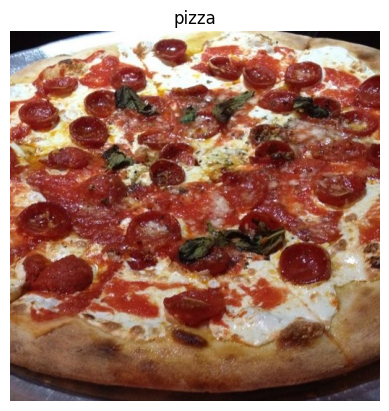

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 12,   7,  13],
        [ 12,   7,  13],
        [ 12,   7,  13],
        ...,
        [ 11,   6,  10],
        [ 11,   6,  10],
        [ 11,   6,  10]],

       [[ 12,   7,  13],
        [ 12,   7,  13],
        [ 11,   6,  12],
        ...,
        [ 11,   6,  10],
        [ 11,   6,  10],
        [ 11,   6,  10]],

       [[ 12,   7,  11],
        [ 11,   6,  10],
        [ 11,   6,  10],
        ...,
        [ 11,   6,  10],
        [ 11,   6,  10],
        [ 11,   6,  10]],

       ...,

       [[102,  87,  90],
        [ 99,  84,  87],
        [ 96,  81,  84],
        ...,
        [ 74,  72,  93],
        [ 72,  70,  91],
        [ 70,  68,  89]],

       [[101,  86,  91],
        [100,  85,  90],
        [ 98,  83,  88],
        ...,
        [ 74,  71,  90],
        [ 71,  70,  88],
        [ 66,  65,  83]],

       [[ 99,  84,  89],
        [ 99,  84,  89],
        [ 99,  84,  89],
        ...,
        [ 73,  70,  8

In [11]:
# View the image shape
img.shape # returns width , height , color channels

(512, 512, 3)

**Note**: As we've discussed before, many machine learning moels, including neural networks prefer the va;ues they work with to be between 0&1. Knowing this, one of the most common preprocessing steps for working woth the images is to scale (also reffered to as **normalize**) their pixel values by dividing the image array by 255.(Since 255 is the maximum pixel value).

In [12]:
# Get all the pizel values b/w 0&1
img/255.0

array([[[0.04705882, 0.02745098, 0.05098039],
        [0.04705882, 0.02745098, 0.05098039],
        [0.04705882, 0.02745098, 0.05098039],
        ...,
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569]],

       [[0.04705882, 0.02745098, 0.05098039],
        [0.04705882, 0.02745098, 0.05098039],
        [0.04313725, 0.02352941, 0.04705882],
        ...,
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569]],

       [[0.04705882, 0.02745098, 0.04313725],
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569],
        ...,
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569],
        [0.04313725, 0.02352941, 0.03921569]],

       ...,

       [[0.4       , 0.34117647, 0.35294118],
        [0.38823529, 0.32941176, 0.34117647],
        [0.37647059, 0

## An end-to-end example
Let's build a convulational neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocessing data(get all of the pixel values between 0 & 1, also called as normalization)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit our model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 176ms/step - loss: 0.5565 - accuracy: 0.7060 - val_loss: 0.4390 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4411 - accuracy: 0.8087 - val_loss: 0.4220 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 7s 159ms/step - loss: 0.4070 - accuracy: 0.8193 - val_loss: 0.3383 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3544 - accuracy: 0.8547 - val_loss: 0.3012 - val_accuracy: 0.8960
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3014 - accuracy: 0.8773 - val_loss: 0.3115 - val_accuracy: 0.8840


In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

The model we've building is fro the tensorflow playground:

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 0.6935 - accuracy: 0.5547 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Improving the previous model

# Set the random seed
tf.random.set_seed(42)

# Building the model


model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compilibg the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model

model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 127ms/step - loss: 2.4607 - accuracy: 0.5900 - val_loss: 0.5249 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.7738 - accuracy: 0.7027 - val_loss: 0.5209 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.5612 - accuracy: 0.7467 - val_loss: 1.1338 - val_accuracy: 0.6460
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.7902 - accuracy: 0.7273 - val_loss: 0.4530 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.5381 - accuracy: 0.7740 - val_loss: 0.5969 - val_accuracy: 0.7680


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Params of NN vs CNN
15073201/31101

484.6532587376612

**Note**: You can think of trainable parameters as **patterns a model can learn from data** Intuitively, you might think more is better. And in lots of cases , it is. But in this case, the difference here is the two different styles of models we're using. Where a series of dense layers has a different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural networks, these are often more helpful in dechipering between different **features** in an image.

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification

1. Become one with the data (visualize,visualize,visualize)
2. Preprocess the data(prepared it for our model, the main step here was scalling/normallizing)
3. Create the model (start with a baseline)
4. FIt the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat untill staisfied(experiment,experiment,experiemnt)

##1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


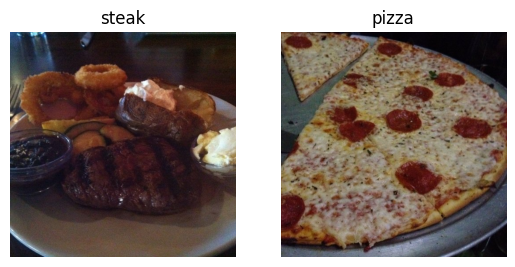

In [21]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

## 2. Preprocess the data (prepare it for our model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.
It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10,000 images on one hit could result in the model being able to learn very well.

Why 32?

Because 32 is commonly used default value

In [23]:
!nvidia-smi

Mon Jan 29 21:10:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              32W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our Image data from directories and train them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height & width )
                                               class_mode="binary", # Type of data you are working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a training data batch
images , labels = train_data.next() # get the 'next' batch of images/labels in the train data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there
len(train_data)

47

In [29]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [31]:
images[7].shape

(224, 224, 3)

In [32]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model(start with a baseline)

A baseline is a relativley simple model or existing result that you setup when beginning a machine learning experiment and then you keep experimenting, you try to beat the baseline


> **Note**: In Deep Learning there are an infinite amount of architectures you can create. So one of the best ways to get started is to start with something simple and seee if it works on your data and then introduce complexity as required(e.g. look at which current model is performing best in the field for your problem)

In [34]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [35]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer(specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])